In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('../Data/Prices.xlsx', sheet_name='Daily', skiprows=8, usecols='D:E', index_col='Name',engine='openpyxl')

In [4]:
df

,US dollar
Name,
1978-12-29,226.00
1979-01-01,226.00
1979-01-02,226.80
1979-01-03,218.60
1979-01-04,223.15
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [5]:
df.index # it is an attribute, not function

DatetimeIndex(['1978-12-29', '1979-01-01', '1979-01-02', '1979-01-03',
               '1979-01-04', '1979-01-05', '1979-01-08', '1979-01-09',
               '1979-01-10', '1979-01-11',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='Name', length=13622, freq=None)

In [6]:
df.describe()

,US dollar
count,11441.000000
mean,724.840940
std,502.267165
min,216.850000
25%,354.250000
50%,422.200000
75%,1204.500000
max,2067.150000


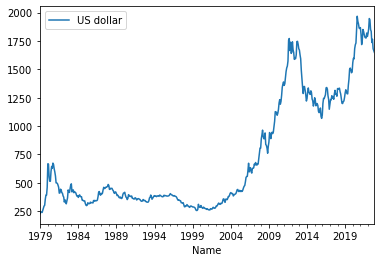

In [7]:
df.resample(rule='M').mean().plot(); # 1978 Dec-Curr

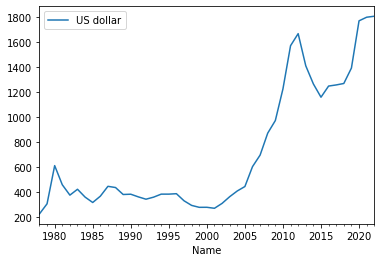

In [8]:
df.resample(rule='AS').mean().plot(); # AS means Year Start


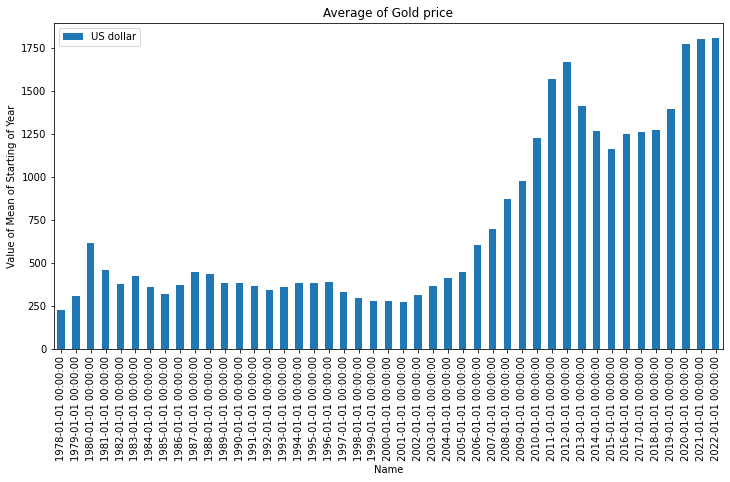

In [9]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Gold price', ylabel='Value of Mean of Starting of Year');

<AxesSubplot:xlabel='Name'>

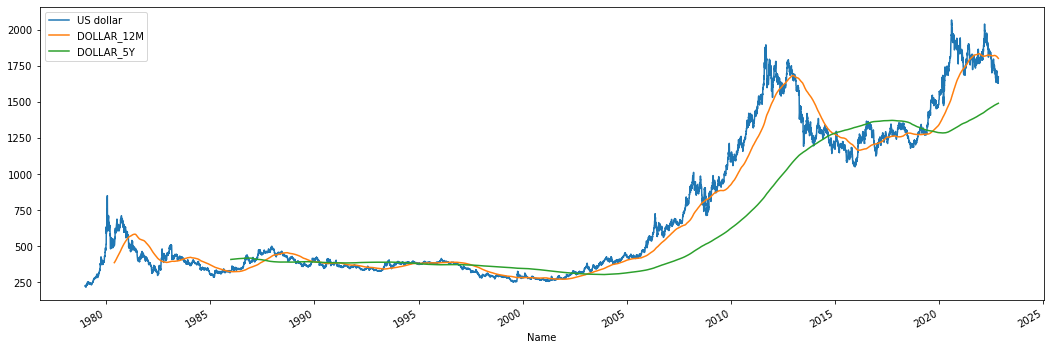

In [10]:
df['DOLLAR_12M'] = df['US dollar'].rolling(window=365).mean()
df['DOLLAR_5Y'] = df['US dollar'].rolling(window=365*5+1).mean()
df[['US dollar','DOLLAR_12M','DOLLAR_5Y']].plot(figsize=(18,6))

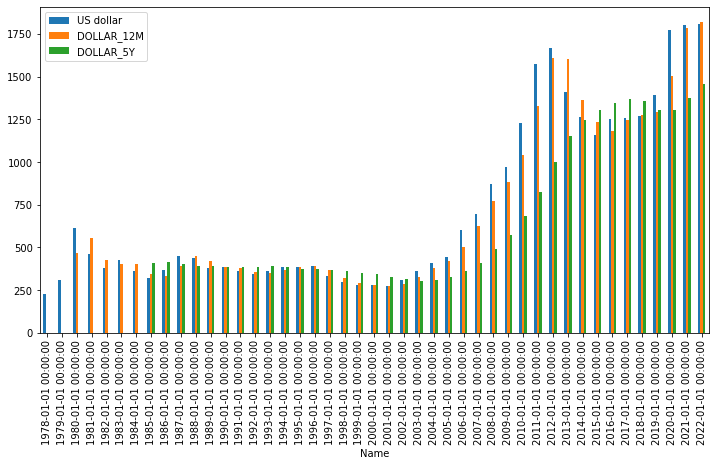

In [11]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))


[Text(0, 0.5, 'Value of Mean of Starting of Month'),
 Text(0.5, 1.0, 'Average Price of Gold in USD')]

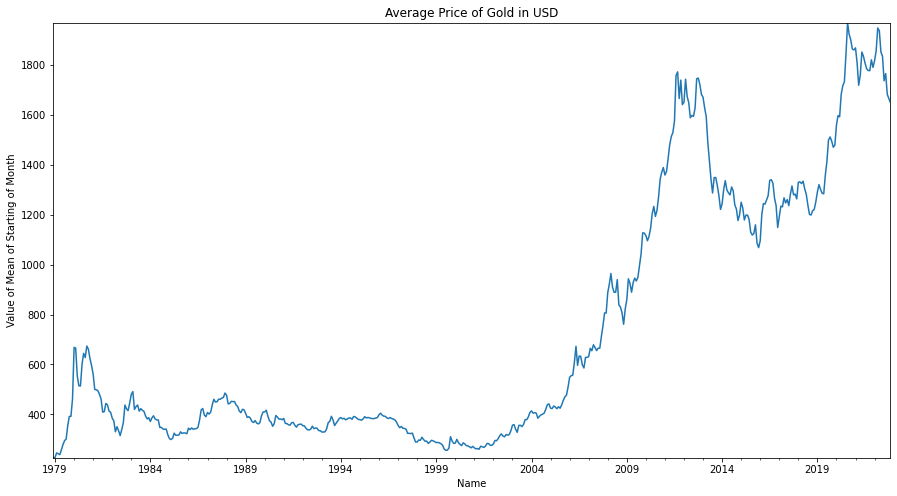

In [12]:
ax = df['US dollar'].resample(rule='M').mean().plot(figsize=(15,8), label='Resample MS') # monthly resampled mean
ax.autoscale(tight=True)
ax.set(ylabel='Value of Mean of Starting of Month',title='Average Price of Gold in USD')

[Text(0, 0.5, 'Value of Mean of Starting of Month'),
 Text(0.5, 1.0, 'Average Price of Gold in USD')]

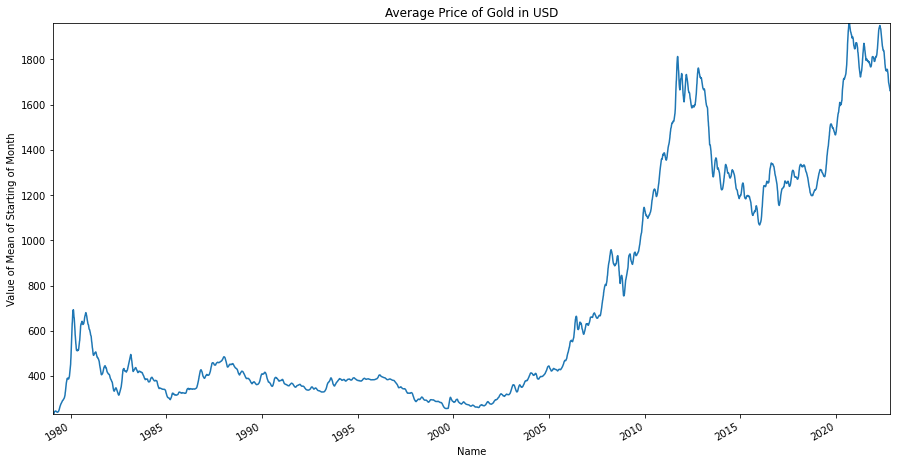

In [13]:
ax2 = df.rolling(window=30).mean()['US dollar'].plot(figsize=(15,8),label='Rolling window=30') # monthly rolling windows/moving average
ax2.autoscale(tight=True)
ax2.set(ylabel='Value of Mean of Starting of Month',title='Average Price of Gold in USD')

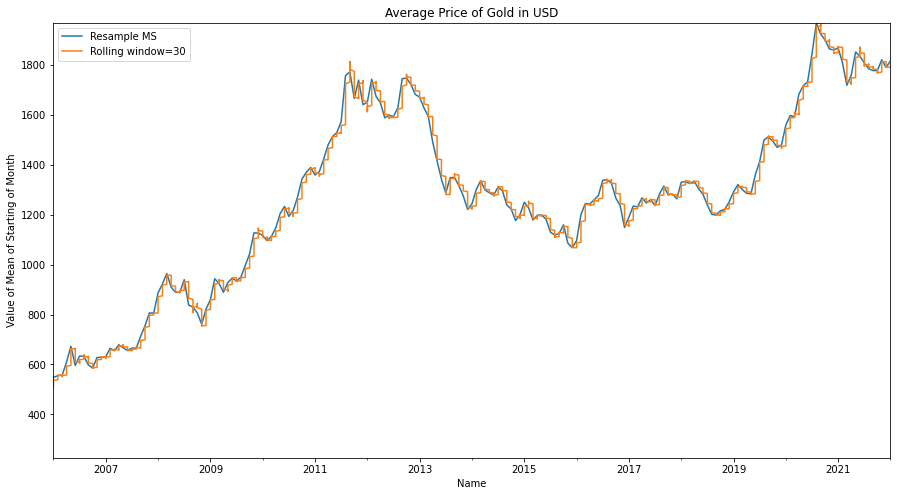

In [14]:
ax = df['US dollar'].resample(rule='M').mean().plot(xlim=['2006-01-01','2022-01-01'], figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['US dollar'].plot(xlim=['2006-01-01','2022-01-01'],label='Rolling window=30')
ax.set(ylabel='Value of Mean of Starting of Month',title='Average Price of Gold in USD')
ax.legend()

In [15]:
del  df['DOLLAR_12M'],df['DOLLAR_5Y']

<AxesSubplot:xlabel='Name'>

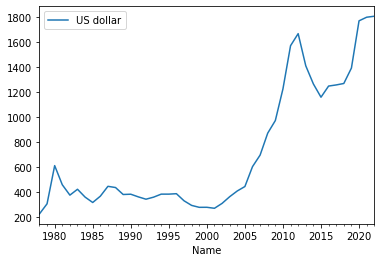

In [16]:
df.resample(rule='1y').mean().plot() #1y = 1 years


<AxesSubplot:xlabel='Name'>

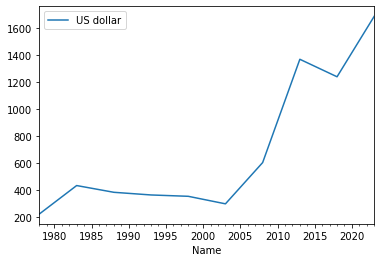

In [17]:
df.resample(rule='5y').mean().plot() #5y = 5 years


<AxesSubplot:xlabel='Name'>

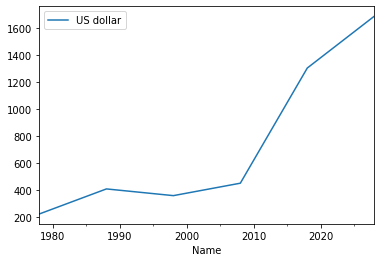

In [18]:
df.resample(rule='10y').mean().plot()


<AxesSubplot:xlabel='Name'>

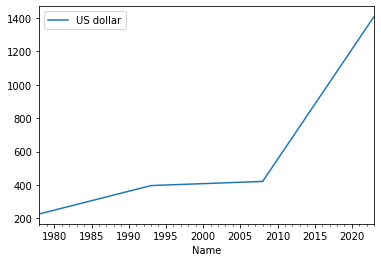

In [19]:
df.resample(rule='15y').mean().plot()


In [20]:
import fbprophet


In [21]:
# renaming for fbprophet
df.rename_axis('ds', inplace=True)
df.rename(columns={'US dollar':'y'}, inplace=True)
df.reset_index(inplace=True)
df.head()

,ds,y
0,1978-12-29,226.00
1,1979-01-01,226.00
2,1979-01-02,226.80
3,1979-01-03,218.60
4,1979-01-04,223.15


In [22]:
df.dropna(inplace=True)

In [23]:
from fbprophet import Prophet 
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(df)

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [24]:
future_dataset= prophet_model.make_future_dataframe(periods=15, freq='y') # Next 15 YEARS OF DATA
future_dataset.tail()

,ds
11451,2032-12-31
11452,2033-12-31
11453,2034-12-31
11454,2035-12-31
11455,2036-12-31


In [25]:
pred = prophet_model.predict(future_dataset)
pred[['ds','yhat', 'yhat_lower', 'yhat_upper']].head() # only useful columns

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,ds,yhat,yhat_lower,yhat_upper
0,1978-12-29,182.126407,85.046234,278.524109
1,1979-01-01,186.999063,90.421488,284.901197
2,1979-01-02,188.638648,90.121852,289.548679
3,1979-01-03,190.429416,93.169181,288.975812
4,1979-01-04,192.153274,99.887323,286.800435


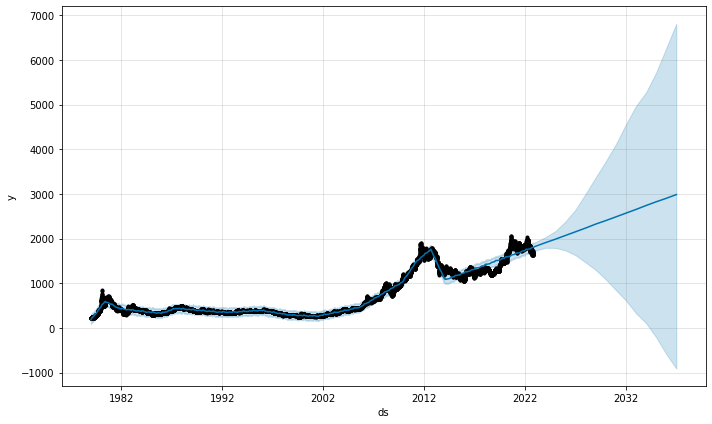

In [26]:
prophet_model.plot(pred);

In [27]:
def fb_prophet_function(data, future_years, seasonality_name, seasonality_val,seasonality_fourier, **params):
    """
    Trains a fb prophet model on given hyperparameters and custom
    seasonality, predicts on future dataset, plot the results and
    return the model.
    """
    start= time.time()
    prophet_model = Prophet(**params)
    
    prophet_model.add_seasonality(name=seasonality_name, period=seasonality_val, fourier_order=seasonality_fourier)
        
    prophet_model.fit(data)
    
    future_dataset = prophet_model.make_future_dataframe(periods=future_years, freq='y')
    
    pred = prophet_model.predict(future_dataset)
    
    prophet_model.plot(pred);
    plt.ylim(-500, 3000)
    plt.title(f"fourier order{seasonality_fourier}, seasonality time {seasonality_name}")
    plt.show()
    
    end = time.time()
    print(f"Total Execution Time {end-start} seconds")
    return prophet_model

In [28]:
def plot_valid(validation_set, size, model):
    pred = model.predict(validation_set)
    temp = df[-size:].copy().reset_index()
    temp['pred']=pred['yhat']
    temp.set_index('ds')[['y', 'pred']].plot()
    plt.tight_layout()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



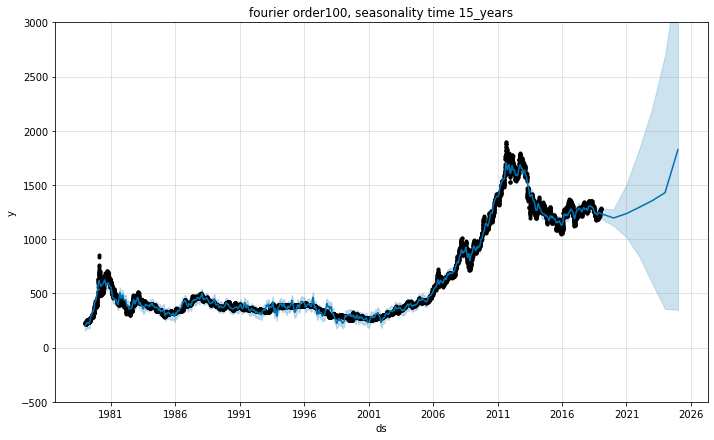

Total Execution Time 202.77801704406738 seconds


In [29]:
import time
training_set = df[:-1000] 
validation_set = df[-1000:] #last 1000 rows, i.e from Jul 2018
# 15 years seasonlaity, additive, no other seasonality, less fourier value
fifteen_years = fb_prophet_function(data=training_set, future_years=6, seasonality_name='15_years', seasonality_val=365*15, seasonality_fourier=100,seasonality_mode='additive')

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



Text(0.5, 1.0, 'Hyp parameters: 15_years seasonality, seasonality_fourier=100, seasonality_mode=additive\n prediction from Jul2018-Apr2022(from training set i.e validation set)')

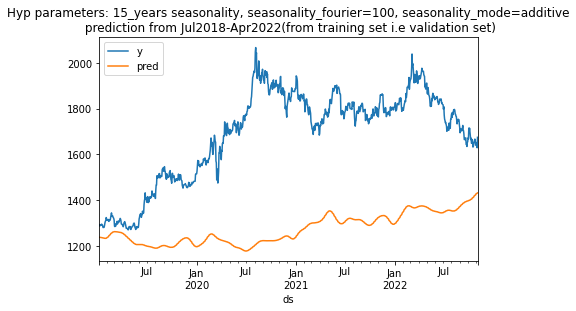

In [30]:
plot_valid(validation_set, 1000, fifteen_years)
plt.title("Hyp parameters: 15_years seasonality, seasonality_fourier=100, seasonality_mode=additive\n prediction from Jul2018-Apr2022(from training set i.e validation set)")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



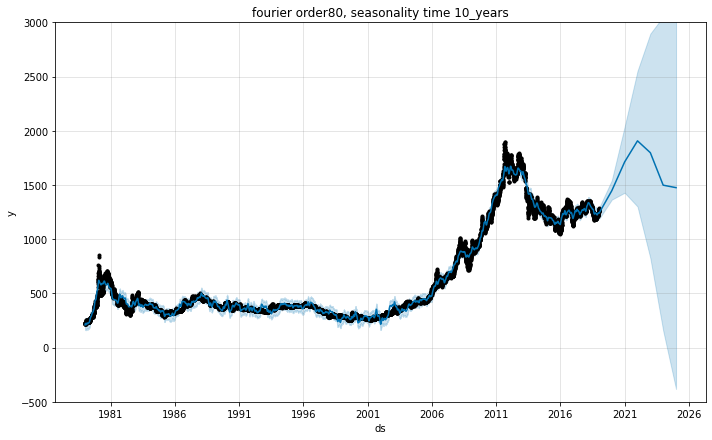

Total Execution Time 199.79793000221252 seconds


In [31]:
# 10 years seasonlaity, no other seasonlaity, additive, less fourier
training_set = df[:-1000]
validation_set = df[-1000:]
ten_years_model = fb_prophet_function(data=training_set, future_years=6, seasonality_name='10_years', seasonality_val=365*10, seasonality_fourier=80,seasonality_mode='additive')

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

/Users/simranjeetsingh1497/opt/anaconda3/envs/goldprices/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



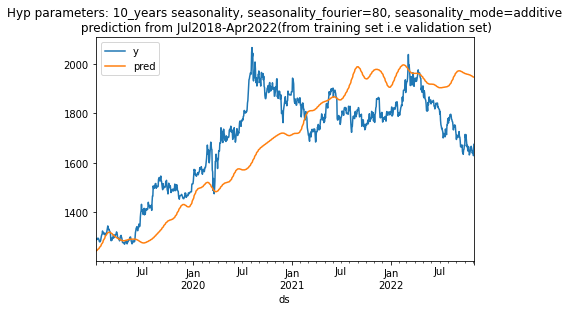

In [32]:
plot_valid(validation_set, 1000, ten_years_model)
plt.title("Hyp parameters: 10_years seasonality, seasonality_fourier=80, seasonality_mode=additive\n prediction from Jul2018-Apr2022(from training set i.e validation set)");

In [33]:
import pickle
with open('../Model/fbprophet.pckl', 'wb') as fout: # saving the model in models directory
    pickle.dump(ten_years_model, fout)

In [34]:
import datetime

with open(f"../Model/fbprophet.pckl", "rb",) as fin:
    try:
        model = pickle.load(fin)
    except (OSError, FileNotFoundError, TypeError):
        print("wrong path/ model not available")
        
def calculate_next_date(prev_date):
    """Calculates next date date_format = yyyy-mm-dd"""
    next_date = datetime.datetime(*list(map(lambda x: int(x), prev_date.split("-")))) + datetime.timedelta(days=1)  # next date
    return next_date
    
def get_next_date(prev_date):
    return calculate_next_date(prev_date)
   
def preprocess_inputs(prev_date):
    """
    Model takes in an input as a pandas dataframe having index 
    as the day to be predicted """
    next_date = calculate_next_date(prev_date)  # get the self.next_date var
    next_date_series = pd.DataFrame(
        {"ds": pd.date_range(start=next_date, end=next_date)}
    )
    return next_date_series

def postprocess_outputs(output_from_model):
    """
    Return the yhat in the list format"""
    return output_from_model["yhat"].tolist()

def predict(prev_date):
    next_date_series = preprocess_inputs(prev_date)  # preprocess
    pred = model.predict(next_date_series)  # prediction
    pred = postprocess_outputs(pred)  # postprocess prediction
    return pred  # return prediction

In [35]:
df.tail()

,ds,y
11436,2022-10-31,1639.00
11437,2022-11-01,1645.25
11438,2022-11-02,1649.55
11439,2022-11-03,1628.75
11440,2022-11-04,1674.40


In [41]:
data = ['2022-12-31','2023-01-01']
for date in data:
    print(predict(date))

[1798.8341486370591]
[1899.6305306732563]
